**handson用資料としての注意点**

普通、同じセル上で何度も試行錯誤するので、最終的に上手くいったセルしか残らず、失敗したセルは残りませんし、わざわざ残しません。

今回はhandson用に 試行・思考過程を残したいと思い、エラーやミスが出ても下のセルに進んで処理を実行するようにしています。

notebookのセル単位の実行ができるからこそのやり方かもしれません。良い。

（下のセルから文は常体で書きます。）

kunai (@jdgthjdg)

---


In [7]:
import sys;print(sys.version)

3.7.1 | packaged by conda-forge | (default, Feb 26 2019, 04:48:14) 
[GCC 7.3.0]


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#設定でDataFrameなどが長く表示されないようにします（画面領域の消費を抑えてhandsonをしやすくするため）
# 長い場合の途中の省略表示(...)を出す閾値の設定（折り返しとは無関係）
pd.set_option('max_rows',10)
pd.set_option('max_columns',20) # これを超えたら全部は表示しない。 A B C ... X Y Z のように途中を省く。

In [4]:
plt.rcParams["figure.figsize"] = [18, 6]
plt.rcParams['xtick.labelsize'] = 14 # 横軸のフォントサイズ
plt.rcParams['ytick.labelsize'] = 14 # 縦軸のフォントサイズ

In [14]:
pwd

'/home/jovyan/work'

In [15]:
ls ../../../data

01_jinkou.csv            01_tenki.csv  2010_kansai/  2013_kansai/  2016_kansai/
01_jinkou_todohuken.csv  2008_kansai/  2011_kansai/  2014_kansai/  2017_kansai/
___01_tenki.csv          2009_kansai/  2012_kansai/  2015_kansai/  2018_kansai/


In [5]:
ls -lh ../../../data/2008_kansai/ #AMeDAS2008\(è╓É╝\).xls

total 3.1M
-rw-r--r-- 1 jovyan users 2.6M Mar  9 03:48 'AMeDAS2008(è╓É╝).xls'
-rw-r--r-- 1 jovyan users 516K Mar  9 03:48 'ë╘ò▓âfü[â^2008(è╓É╝).xls'


---

## エクセル(.xls/.xlsx) を読んでみる

pandas なら pd.read_XXX系 (csv, excel, sqlなど) を使えばほぼOK

非公式のサイトも良いですが、基本的に困ったら公式のドキュメントが良い。(結局こっちのが早くて確実だったり、知らないオプションを知る機会になる。自戒でもある。)  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html
    
入出力系<BR>
https://pandas.pydata.org/pandas-docs/stable/reference/io.html

---

試しに化けまくりのパスをコピペして入れてみる

In [3]:
df = pd.read_excel("../../../data/2008_kansai/ë╘ò▓âfü[â^2008(è╓É╝).xls")
df.head(3)

,花粉自動測定器による観測データ,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,年,月,日,時,彦根,大津,今津,野洲,京都,舞鶴,...,篠山,山崎,奈良,吉野,大和高田,和歌山,田辺,中辺路,NaN,NaN
1,2008,2,1,1,0,4,0,0,0,0,...,0,4,4,0,8,0,NaN,0,NaN,-9998:降雪による欠測
2,2008,2,1,2,0,0,0,0,0,-9998,...,0,0,0,0,0,8,NaN,0,NaN,-9997:黄砂による欠測


<br>

**読めた**

---
列名が **Unnamed: 1** とおかしい


**エクセルで開いたファイル** と見比べると、一行目はこのデータの名前(花粉自動測定器による観測データ)だけを載せているようだ  

なんとかならんかと公式ドキュメントを読む  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html


>header : int, list of int, default 0  
>Row (0-indexed) to use for the column labels of the parsed DataFrame.  
>If a list of integers is passed those row positions will be combined into a MultiIndex. Use None if there is no header.
 
    とか  
    
>skiprows : list-like
>Rows to skip at the beginning (0-indexed).

skiprowsが楽そう

In [5]:
df = pd.read_excel("../../../data/2008_kansai/ë╘ò▓âfü[â^2008(è╓É╝).xls", skiprows=1)
df.head()

,年,月,日,時,彦根,大津,今津,野洲,京都,舞鶴,...,篠山,山崎,奈良,吉野,大和高田,和歌山,田辺,中辺路,Unnamed: 24,Unnamed: 25
0,2008,2,1,1,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,4.0,4.0,0.0,8.0,0.0,NaN,0.0,NaN,-9998:降雪による欠測
1,2008,2,1,2,0.0,0.0,0.0,0.0,0.0,-9998.0,...,0.0,0.0,0.0,0.0,0.0,8.0,NaN,0.0,NaN,-9997:黄砂による欠測
2,2008,2,1,3,0.0,0.0,-9998.0,0.0,0.0,-9998.0,...,0.0,0.0,0.0,0.0,4.0,0.0,NaN,0.0,NaN,-9996:その他の欠測(前後の時間や周辺観測値と比較して不自然なデータ)
3,2008,2,1,4,0.0,0.0,4.0,0.0,0.0,-9998.0,...,0.0,0.0,0.0,0.0,0.0,8.0,NaN,0.0,NaN,空白:未観測または通信障害による欠測
4,2008,2,1,5,0.0,8.0,20.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN


ちゃんとしたヘッダーになった！

---

上の舞鶴のデータにある、 -9998 とかなんだ？？

**一番右の列(Unnamed: 25)に結構大事なことが書いてある。。。**

- -9998:降雪による欠測
- -9997:黄砂による欠測
- -9996:その他の欠測(前後の時間や周辺観測値と比較して不自然なデータ)
- 空白:未観測または通信障害による欠測


ちゃんと成形されてDBなどに保存されたデータなら、このような独自の列を使っての無理矢理のコメントはないが、  
担当者が手作業でぽちぽちと打った、ぬくもりのあるエクセルには良くある。


<br>
<br>
ぬくもりがあると、プログラムからはとても読みにくい・・・


もうメモったので右の2列は邪魔なので消す。  
邪魔なので消す。

# pandasでの列選択
---

 
**列だけなら　df \[ "列名" \]　が一番手っ取り早い。**

* 今回は列名というよりも右から2つという数値的な位置決めのが楽そう

### **xy座標っぽい選択なら　df.iloc[ 行(y軸), 列(x軸) ] を使う**

* 行は絞らないので、行部分は ' : '(全選択) で良い  
例: df.iloc[:, 3]  
例: df.iloc[3] # 二個目を省略すると行選択のみになる。列には ':' が入っているのと同等で全部が選択される。（pd.Series という型）

* 行も列もそれぞれ複数指定ができる  
例: df.iloc[:, [1,2] ]

* スライスも使える
例: df.iloc[2:4,:8]

In [6]:
df.head() # 選択前のdf

,年,月,日,時,彦根,大津,今津,野洲,京都,舞鶴,...,篠山,山崎,奈良,吉野,大和高田,和歌山,田辺,中辺路,Unnamed: 24,Unnamed: 25
0,2008,2,1,1,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,4.0,4.0,0.0,8.0,0.0,NaN,0.0,NaN,-9998:降雪による欠測
1,2008,2,1,2,0.0,0.0,0.0,0.0,0.0,-9998.0,...,0.0,0.0,0.0,0.0,0.0,8.0,NaN,0.0,NaN,-9997:黄砂による欠測
2,2008,2,1,3,0.0,0.0,-9998.0,0.0,0.0,-9998.0,...,0.0,0.0,0.0,0.0,4.0,0.0,NaN,0.0,NaN,-9996:その他の欠測(前後の時間や周辺観測値と比較して不自然なデータ)
3,2008,2,1,4,0.0,0.0,4.0,0.0,0.0,-9998.0,...,0.0,0.0,0.0,0.0,0.0,8.0,NaN,0.0,NaN,空白:未観測または通信障害による欠測
4,2008,2,1,5,0.0,8.0,20.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN


In [9]:
df.iloc[2] # 二個目を省略すると行選択

年                                               2008
月                                                  2
日                                                  1
時                                                  3
彦根                                                 0
                               ...                  
和歌山                                                0
田辺                                               NaN
中辺路                                                0
Unnamed: 24                                      NaN
Unnamed: 25    -9996:その他の欠測(前後の時間や周辺観測値と比較して不自然なデータ)
Name: 2, Length: 26, dtype: object

In [21]:
df.iloc[1, 3]  # x,yを指定して、要素一つを抜き出す

2

In [47]:
df.iloc[:3, [0,5] ]  # スライスやら、リストなどで複数指定

,年,大津
0,2008,4.0
1,2008,0.0
2,2008,0.0


---

### 味のある右の2列を消す

In [22]:
df.head(2)

,年,月,日,時,彦根,大津,今津,野洲,京都,舞鶴,...,篠山,山崎,奈良,吉野,大和高田,和歌山,田辺,中辺路,Unnamed: 24,Unnamed: 25
0,2008,2,1,1,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,4.0,4.0,0.0,8.0,0.0,NaN,0.0,NaN,-9998:降雪による欠測
1,2008,2,1,2,0.0,0.0,0.0,0.0,0.0,-9998.0,...,0.0,0.0,0.0,0.0,0.0,8.0,NaN,0.0,NaN,-9997:黄砂による欠測


In [49]:
# スライスを使って左端から右の3列目までを選択
df = df.iloc[:,:-2]
df.head(3)

,年,月,日,時,彦根,大津,今津,野洲,京都,舞鶴,...,神戸,西宮,篠山,山崎,奈良,吉野,大和高田,和歌山,田辺,中辺路
0,2008,2,1,1,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,4.0,0.0,8.0,0.0,NaN,0.0
1,2008,2,1,2,0.0,0.0,0.0,0.0,0.0,-9998.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,NaN,0.0
2,2008,2,1,3,0.0,0.0,-9998.0,0.0,0.0,-9998.0,...,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,NaN,0.0


---

ちなみに・・・　2018年などは xlsx形式だが、 skiprows=1して、右2列が不要という形式は同じっぽい

In [55]:
df = pd.read_excel("../../../data/2018_kansai/ë╘ò▓âfü[â^2018(è╓É╝).xlsx", )
df.head(3)

,花粉自動測定器による観測データ,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,年,月,日,時,彦根地方気象台,滋賀県琵琶湖・環境科学研究センター,滋賀県高島合同庁舎,京都府立医科大学,舞鶴市西ｺﾐｭﾆﾃｨｾﾝﾀｰ,京都市右京区役所京北合同庁舎,...,兵庫県篠山庁舎,兵庫県環境研究センター,奈良県産業振興総合センター,奈良県吉野保健所,橿原総合庁舎,和歌山地方気象台,和歌山県西牟婁振興局庁舎,和歌山県東牟婁振興局,NaN,NaN
1,2018,2,1,1,0,0,0,4,24,0,...,4,0,4,0,8,0,12,0,NaN,-9998:降雪による欠測
2,2018,2,1,2,0,4,0,4,8,0,...,8,8,8,8,0,4,12,4,NaN,-9997:黄砂による欠測


ここでも
- -9998:降雪による欠測
- -9997:黄砂による欠測
- -9996:その他の欠測(前後の時間や周辺観測値と比較して不自然なデータ)
- 空白:未観測または通信障害による欠測

***

## ついでに、AMeDASのデータも読んでみる

In [24]:
ame_path = "../../../data/2008_kansai/AMeDAS2008(è╓É╝).xls"
amedas = pd.read_excel(ame_path)
amedas.head(3)

,月,日,時,彦根市役所,滋賀県琵琶湖・環境科学研究センター,滋賀県高島県事務所,滋賀県森林センター,京都府立医科大学,京都府中丹東保健所,京都市右京区役所京北合同庁舎,...,兵庫県立健康環境科学研究センター,北山緑化植物園（西宮市都市整備公社）,兵庫県篠山庁舎,兵庫みどり公社西播磨事務所,奈良県保健環境研究センター,奈良県吉野保健所,奈良県高田総合庁舎,和歌山地方気象台,和歌山県西牟婁振興局庁舎,和歌山県農林水産総合技術センター林業試験場中辺路試験地
0,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,3,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
amedas.columns

Index(['月', '日', '時', '彦根市役所', '滋賀県琵琶湖・環境科学研究センター', '滋賀県高島県事務所', '滋賀県森林センター',
       '京都府立医科大学', '京都府中丹東保健所', '京都市右京区役所京北合同庁舎', '大阪府環境情報センター', '豊中市役所第一庁舎',
       '大阪府南河内農と緑の総合事務所 滝畑ダム分室', '兵庫県立健康環境科学研究センター', '北山緑化植物園（西宮市都市整備公社）',
       '兵庫県篠山庁舎', '兵庫みどり公社西播磨事務所', '奈良県保健環境研究センター', '奈良県吉野保健所', '奈良県高田総合庁舎',
       '和歌山地方気象台', '和歌山県西牟婁振興局庁舎', '和歌山県農林水産総合技術センター林業試験場中辺路試験地'],
      dtype='object')

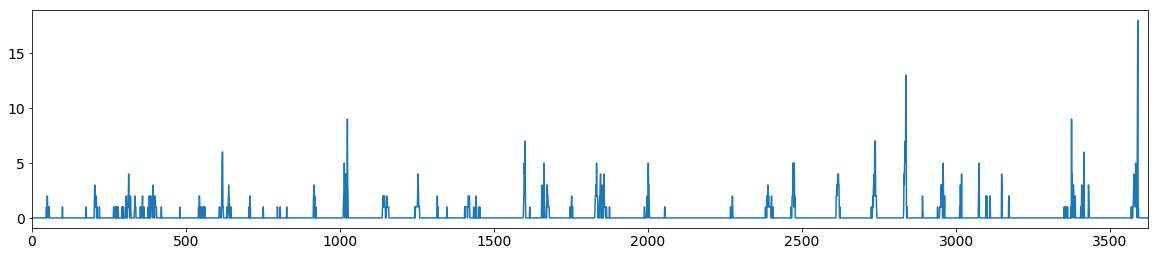

In [26]:
amedas["彦根市役所"].plot(figsize=(20,4));

---

複数のシートがあるのでそれも見る

In [27]:
amedas1 = pd.read_excel(ame_path, sheet_name=1)
amedas1.head(3)


,月,日,時,彦根市役所,滋賀県琵琶湖・環境科学研究センター,滋賀県高島県事務所,滋賀県森林センター,京都府立医科大学,京都府中丹東保健所,京都市右京区役所京北合同庁舎,...,兵庫県立健康環境科学研究センター,北山緑化植物園（西宮市都市整備公社）,兵庫県篠山庁舎,兵庫みどり公社西播磨事務所,奈良県保健環境研究センター,奈良県吉野保健所,奈良県高田総合庁舎,和歌山地方気象台,和歌山県西牟婁振興局庁舎,和歌山県農林水産総合技術センター林業試験場中辺路試験地
0,2,1,1,2.4,1.4,0.8,1.4,2.2,1.4,-0.1,...,3.0,3.0,3.0,-0.3,0.7,0.7,0.7,4.4,4.8,2.9
1,2,1,2,3.5,0.9,0.6,0.9,2.6,0.7,-0.1,...,2.6,2.6,2.6,0.1,1.1,0.5,1.1,4.3,4.5,2.0
2,2,1,3,3.5,1.6,0.5,1.6,2.9,0.5,-0.1,...,3.0,3.0,3.0,-0.6,1.4,0.3,1.4,4.4,4.6,0.9


In [28]:
amedas2 = pd.read_excel(ame_path, sheet_name=2)
amedas2.head(3)


,月,日,時,彦根市役所,滋賀県琵琶湖・環境科学研究センター,滋賀県高島県事務所,滋賀県森林センター,京都府立医科大学,京都府中丹東保健所,京都市右京区役所京北合同庁舎,...,兵庫みどり公社西播磨事務所,奈良県保健環境研究センター,奈良県吉野保健所,奈良県高田総合庁舎,和歌山地方気象台,和歌山県西牟婁振興局庁舎,和歌山県農林水産総合技術センター林業試験場中辺路試験地,Unnamed: 23,単位：,Unnamed: 25
0,2,1,1,2,0,16,0,14,10,0,...,6,7,10,7,14,16,16,NaN,0.0,静穏
1,2,1,2,13,0,9,0,10,11,0,...,0,10,12,10,14,16,1,NaN,1.0,北北東
2,2,1,3,13,0,0,0,11,6,0,...,0,8,12,8,14,16,2,NaN,2.0,北東


In [29]:
amedas3 = pd.read_excel(ame_path, sheet_name=3)
amedas3.head(3)


,月,日,時,彦根市役所,滋賀県琵琶湖・環境科学研究センター,滋賀県高島県事務所,滋賀県森林センター,京都府立医科大学,京都府中丹東保健所,京都市右京区役所京北合同庁舎,...,兵庫県立健康環境科学研究センター,北山緑化植物園（西宮市都市整備公社）,兵庫県篠山庁舎,兵庫みどり公社西播磨事務所,奈良県保健環境研究センター,奈良県吉野保健所,奈良県高田総合庁舎,和歌山地方気象台,和歌山県西牟婁振興局庁舎,和歌山県農林水産総合技術センター林業試験場中辺路試験地
0,2,1,1,1,0,1,0,1,3,0,...,5,5,5,1,1,4,1,4,3,2
1,2,1,2,4,0,1,0,1,1,0,...,4,4,4,0,1,2,1,5,2,1
2,2,1,3,5,0,0,0,2,1,0,...,4,4,4,0,2,2,2,5,3,1


In [30]:
amedas4 = pd.read_excel(ame_path, sheet_name=4)
amedas4.head(3)


,NIESコード,アメダスコード,地点名
0,52510100,60131,彦根市役所
1,52510300,60216,滋賀県琵琶湖・環境科学研究センター
2,52520100,60051,滋賀県高島県事務所


In [32]:
amedas = pd.read_excel(ame_path, sheet_name=5)
amedas.head(3)
# IndexErrorが出てきたので、もう無い。　おわり

IndexError: list index out of range